In [1]:
import numpy as np
import pycarrot.nn as nn
from pycarrot.carrot import Carrot

In [2]:
# test add
x1 = Carrot([1], requires_grad=True)
x2 = Carrot([4, 5, 6], requires_grad=True)

y = x1 + x2
print(y.data)
print("----------------")
y.backward()
print(y.grad.data)
print("----------------")
print(x1.grad.data)
print("----------------")
print(x2.grad.data)

[5 6 7]
----------------
[1. 1. 1.]
----------------
[3.]
----------------
[1. 1. 1.]


In [3]:
# test mul(*)
x1 = Carrot([[3], [2], [3]], requires_grad=True)
x2 = Carrot([4, 5, 6], requires_grad=True)
x3 = Carrot([7, 8, 9], requires_grad=True)

y = x1 * x2 + x3
print(y.data)
print("----------------")
y.backward()
print(y.grad.data)
print("----------------")
print(y.grad.data * x2.data)
print("----------------")
print(x1.grad.data)
print("----------------")
print(y.grad.data * x1.data)
print("----------------")
print(x2.grad.data)
print("----------------")
print(x3.grad.data)

[[19 23 27]
 [15 18 21]
 [19 23 27]]
----------------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
----------------
[[4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]]
----------------
[[15.]
 [15.]
 [15.]]
----------------
[[3. 3. 3.]
 [2. 2. 2.]
 [3. 3. 3.]]
----------------
[8. 8. 8.]
----------------
[3. 3. 3.]


In [4]:
# test sub(-)
x1 = Carrot([4, 5, 6], requires_grad=True)
x2 = Carrot([7, 8, 9], requires_grad=True)
y = x2 - x1
print(y.name)
print(y.data)
print("----------------")
y.backward()
print(y.grad.data)
print("----------------")
print(x1.grad.data)
print("----------------")
print(x2.grad.data)
print("----------------")

sub
[3 3 3]
----------------
[1. 1. 1.]
----------------
[-1. -1. -1.]
----------------
[1. 1. 1.]
----------------


In [27]:
# test pow
x = Carrot([4, 5, 6], requires_grad=True)
n = 2
# y = x ** 2
y = x.pow(2)
print(y.name)
print(y.data)
print("----------------")
y.backward()
print(y.grad.data)
print("----------------")
print(x.grad.data)

pow
[16 25 36]
----------------
[1. 1. 1.]
----------------
[ 8. 10. 12.]


In [29]:
# test slice(getitem())
x = Carrot([[1, 2, 3], [4, 5, 6], [7, 8, 9]], requires_grad=True)
print(x.data)
y = x[1:, 1:]
print("--------------")
print(y.data)
y.backward()
print("--------------")
print(y.grad.data)
print("--------------")
print(x.grad.data)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
--------------
[[5 6]
 [8 9]]
--------------
[[1. 1.]
 [1. 1.]]
--------------
[[0. 0. 0.]
 [0. 1. 1.]
 [0. 1. 1.]]


In [45]:
x = Carrot([[1, 2, 3], [4, 5, 6], [7, 8, 9]], requires_grad=True)

print(x.data)
print("---------------")
y = x.reshape((9, 1))
print(y.name)
print("---------------")
print(y.data)
print("---------------")
y.backward()
print(y.grad)
print("---------------")
print(x.grad)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
---------------
reshape
---------------
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
---------------
Carrot:([[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], requires_grad=False)
---------------
Carrot:([[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], requires_grad=False)


In [60]:
# test matrix dot product
# x = Carrot([1, 2, 3], requires_grad=True)
x = Carrot([[1, 2, 3]], requires_grad=True)
y = Carrot([[1], [2], [3]], requires_grad=True)

z = x @ y
print(z.name)
print("----------")
print(z.data)
print("----------")
z.backward()
print(z.grad.data)
print("----------")
print(x.grad.data)
print("----------")
print(y.grad.data)

@
----------
[[14]]
----------
[[1.]]
----------
[[1. 2. 3.]]
----------
[[1.]
 [2.]
 [3.]]


In [67]:
# test carrot.sum()
x = Carrot([[1], [2], [3]], requires_grad=True)
y = x.sum()
print(x.data)
print("------------")
print(y.name)
print(y.data)
print("------------")
y.backward()
print(y.grad.data.size)
print("------------")
print(x.grad.data)

[[1]
 [2]
 [3]]
------------
sum
6
------------
1
------------
[[1.]
 [1.]
 [1.]]


In [73]:
x = Carrot([[1, 2, 3], [4, 5, 6], [7, 8, 9]], requires_grad=True)

y = x.mean()
print(len(x))
print("------------")
print(x.data)
print("------------")
print(y.name)
print(y.data)
print("------------")
y.backward()
print(y.grad.data.size)
print("------------")
print(x.grad.data)

3
------------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
------------
mean
5.0
------------
1
------------
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


In [10]:
# test clamp
x = Carrot([[1, 2, 3], [4, 5, 6], [7, 8, 9]], requires_grad=True)

y = x.clamp(3, 6)
print(x.data)
print("------------")
print(y.name)
print(y.data)
print("------------")
y.backward()
print(y.grad.data)
print("------------")
print(x.grad.data)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
------------
clip
[[3 3 3]
 [4 5 6]
 [6 6 6]]
------------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
------------
[[0. 0. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]


Epoch 0, Loss: 5.014262031949656
Epoch 10, Loss: 0.16243478625587252
Epoch 20, Loss: 0.11405180534103909
Epoch 30, Loss: 0.08937007332530515
Epoch 40, Loss: 0.07057004904782653
Epoch 50, Loss: 0.056218966757573645
Epoch 60, Loss: 0.04526389954148419
Epoch 70, Loss: 0.03690121996694665
Epoch 80, Loss: 0.030517470027324967
Epoch 90, Loss: 0.025644359330158708


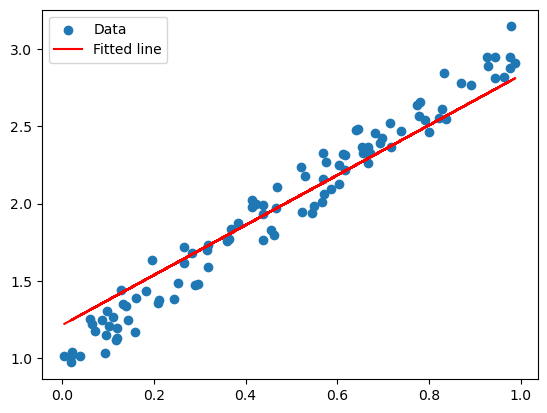

In [15]:
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Define a simple linear regression model
class LinearRegression:
    def __init__(self):
        self.W = Carrot(np.random.randn(1, 1), requires_grad=True)
        self.b = Carrot(np.zeros(1), requires_grad=True)

    def predict(self, X):
        return X @ self.W + self.b

    def loss(self, y_pred, y_true):
        return ((y_pred - y_true) ** 2).mean()

    def train(self, X, y, lr=0.1, epochs=100):
        for epoch in range(epochs):
            y_pred = self.predict(X)
            loss = self.loss(y_pred, y)
            loss.backward()
            self.W.data -= lr * self.W.grad.data
            self.b.data -= lr * self.b.grad.data
            self.W.zero_grad()
            self.b.zero_grad()
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss.data}")

# Convert data to Carrot objects
X_carrot = Carrot(X, requires_grad=False)
y_carrot = Carrot(y, requires_grad=False)

# Train the model
model = LinearRegression()
model.train(X_carrot, y_carrot)

# Plot the results
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X_carrot).data, color="red", label="Fitted line")
plt.legend()
plt.show()

Epoch 0, Loss: 12.557883685522778
Epoch 10, Loss: 0.330203996142436
Epoch 20, Loss: 0.1847861889742321
Epoch 30, Loss: 0.1174541199317165
Epoch 40, Loss: 0.08274340391972937
Epoch 50, Loss: 0.064590958139378
Epoch 60, Loss: 0.05485508983192028
Epoch 70, Loss: 0.04940479207465139
Epoch 80, Loss: 0.04614381212899915
Epoch 90, Loss: 0.044008206911283605


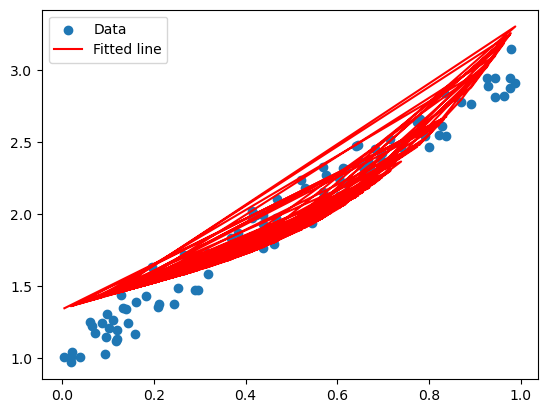

In [23]:
class PolynomialRegression:
    def __init__(self):
        self.W1 = Carrot(np.random.randn(1, 1), requires_grad=True)
        self.W2 = Carrot(np.random.randn(1, 1), requires_grad=True)
        self.W3 = Carrot(np.random.randn(1, 1), requires_grad=True)
        self.b = Carrot(np.zeros(1), requires_grad=True)

    def predict(self, X):
        return self.W1 * X + self.W2 * X.pow(2) + self.W3 * X.pow(3) + self.b

    def loss(self, y_pred, y_true):
        return ((y_pred - y_true) ** 2).mean()

    def train(self, X, y, lr=0.1, epochs=100):
        for epoch in range(epochs):
            y_pred = self.predict(X)
            loss = self.loss(y_pred, y)
            loss.backward()
            self.W1.data -= lr * self.W1.grad.data
            self.W2.data -= lr * self.W2.grad.data
            self.W3.data -= lr * self.W3.grad.data
            self.b.data -= lr * self.b.grad.data
            self.W1.zero_grad()
            self.W2.zero_grad()
            self.W3.zero_grad()
            self.b.zero_grad()
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss.data}")

# Convert data to Carrot objects
X_carrot = Carrot(X, requires_grad=False)
y_carrot = Carrot(y, requires_grad=False)

# Train the model
poly_model = PolynomialRegression()
poly_model.train(X_carrot, y_carrot)

# Plot the results
plt.scatter(X, y, label="Data")
plt.plot(X, poly_model.predict(X_carrot).data, color="red", label="Fitted line")
plt.legend()
plt.show()